# SQLite Exercise

SQLite is a simple way to implement SQL in Python.
It can work off of a database file (.db) that already has tables in it or an empty one.
You can also insert tables into a .db file.
We are going to to both!

# Libraries

Two very important libraries we will need are pandas, and extremely popular data analysis library, and of course SQLite3.

In [1]:
import sqlite3
import pandas as pd

# Connecting to a Database File

- Need to establish a connection: conn = sqlite3.connect('insert database file name here')
- Need to establish a cursor object to execute queries: c = conn.cursor()
- To execute queries: c.execute('insert SQL statement here')

## Let's Explore Chinook!

To see the database diagram follow this link: http://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf

In [2]:
conn = sqlite3.connect('chinook.db') #Note: this file should be located in the same folder you are running this notebook from!
c = conn.cursor()

To display query results, we can use a simple for loop. Run the next cell to see how to display the information in the playlists table.

In [3]:
for row in c.execute('SELECT * FROM playlists'):
    print(row)

(1, 'Music')
(2, 'Movies')
(3, 'TV Shows')
(4, 'Audiobooks')
(5, '90’s Music')
(6, 'Audiobooks')
(7, 'Movies')
(8, 'Music')
(9, 'Music Videos')
(10, 'TV Shows')
(11, 'Brazilian Music')
(12, 'Classical')
(13, 'Classical 101 - Deep Cuts')
(14, 'Classical 101 - Next Steps')
(15, 'Classical 101 - The Basics')
(16, 'Grunge')
(17, 'Heavy Metal Classic')
(18, 'On-The-Go 1')


Now, use the next cell to write a query that displays all of the customers from the customers table

In [4]:
for row in c.execute('SELECT * FROM customers'):
    print(row)

(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3)
(2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5)
(3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3)
(4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4)
(5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4)
(6, 'Helena', 'Holý', None, 'Rilská 3174/6', 'Prague', None, 'Czech Republic', '14300', '+420 2 4177 0449', None, 'hholy@gmail.com', 5)
(7, 'Astrid', '

As we can see, the output isn't that pretty. We can use the pandas library to create a dataframe from our query results!
- pd.read_sql_query(query, conn): where query is the query you want to run and connection is the connection to the database you have established

In the cell below, create a dataframe that holds all of Chinook's Canadian customers, by completing the query that is started:

In [15]:
canadians = pd.read_sql_query("SELECT * FROM customers WHERE Country=='Canada'", conn)
canadians

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
1,14,Mark,Philips,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
2,15,Jennifer,Peterson,Rogers Canada,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,+1 (604) 688-2255,+1 (604) 688-8756,jenniferp@rogers.ca,3
3,29,Robert,Brown,None,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,+1 (416) 363-8888,None,robbrown@shaw.ca,3
4,30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3
5,31,Martha,Silk,None,194A Chain Lake Drive,Halifax,NS,Canada,B3S 1C5,+1 (902) 450-0450,None,marthasilk@gmail.com,5
6,32,Aaron,Mitchell,None,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,+1 (204) 452-6452,None,aaronmitchell@yahoo.ca,4
7,33,Ellie,Sullivan,None,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,+1 (867) 920-2233,None,ellie.sullivan@shaw.ca,3


Create a dataframe that holds the number of invoices per country in descending order

In [25]:
invoicePerCountry = pd.read_sql_query("SELECT COUNT(InvoiceId) as COUNT, BillingCountry FROM invoices GROUP BY BillingCountry ORDER BY COUNT DESC", conn)
invoicePerCountry

,COUNT,BillingCountry
0,91,USA
1,56,Canada
2,35,Brazil
3,35,France
4,28,Germany
5,21,United Kingdom
6,14,Czech Republic
7,14,Portugal
8,13,India
9,7,Argentina


For each record in the Album table, we want the Title along with the Name of the Artist. This will require an inner join!

In [33]:
records = pd.read_sql_query("SELECT albums.Title, artists.Name FROM albums INNER JOIN artists ON albums.ArtistId = artists.ArtistId", conn)
records

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave


## Create Our Own Table

Within the chinook database we want to create a table that holds each Employee ID and their total sales amount from the invoices they are associated with.
- Step 1: Write a query to sum the total sales per employee ID
- Step 2: Create a table called sales in the chinook database that holds two columns: the employee ID and the sale amount
- Step 3: To see if your insert was successful, join the employee ID columns of the employee table and your table to see their names

Complete the queries below to run this exercise. In many cases, if a query is partially formed, you must complete it where you see the three dots (...)

In [34]:
#Step 1 - run this, but make sure you understand how it works
query = "SELECT c.SupportRepID, sum(total) dollars_spent FROM invoices i INNER JOIN Customers c ON c.customerID = i.CustomerID GROUP BY SupportRepID"
df = pd.read_sql_query(query, conn)
df

,SupportRepId,dollars_spent
0,3,833.04
1,4,775.40
2,5,720.16


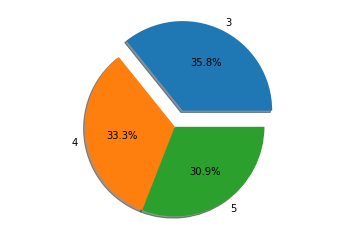

In [36]:
#Quick Visualization -- Run Me!!
import matplotlib.pyplot as plt
import numpy as np

labels = df.SupportRepId.values
sizes = df.dollars_spent.values
explode = (.2, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow = True)
ax1.axis('equal')

plt.show()

In [38]:
#Step 2

#Create Table
# c.execute("CREATE TABLE sales ('employeeID' INT NOT NULL, 'total' DECIMAL NOT NULL)")

#Insert into Table - from your df above choose several values
c.execute("INSERT INTO sales VALUES (3, 833.04)")
c.execute("INSERT INTO sales VALUES (4, 775.40)")
c.execute("INSERT INTO sales VALUES (5, 720.16)")


In [50]:
#Step 3
for row in c.execute('SELECT sales.empID, employees.FirstName, employees.LastName FROM sales INNER JOIN employees ON sales.empID = employees.EmployeeId'):
    print(row)

(3, 'Jane', 'Peacock')
(4, 'Margaret', 'Park')
(5, 'Steve', 'Johnson')


After we are done we have to close the database to make sure it saves everything in our file:

In [51]:
c.close()

*This assignment was completed independently by Jessica Strait.*